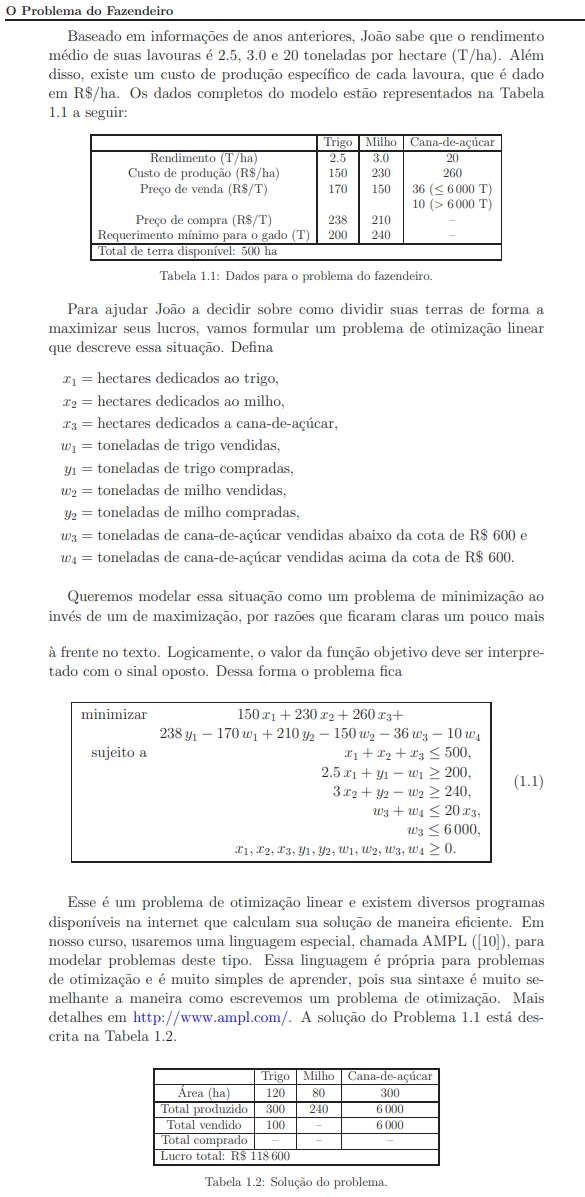

In [ ]:
# Kernel = Pyomo-Lessons (Python 3.11.4) - C:\Users\Sandro\anaconda3\envs\Pyomo-Lessons\python.exe

import pyomo.environ as pyo
from prettytable import PrettyTable

In [ ]:
# Declaração do modelo:
modelo = pyo.ConcreteModel()

In [ ]:
# Variáveis de decisão:
modelo.x1 = pyo.Var(within=pyo.NonNegativeReals)
modelo.x2 = pyo.Var(within=pyo.NonNegativeReals)
modelo.x3 = pyo.Var(within=pyo.NonNegativeReals)

modelo.y1 = pyo.Var(within=pyo.NonNegativeReals)
modelo.y2 = pyo.Var(within=pyo.NonNegativeReals)

modelo.w1 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w2 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w3 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w4 = pyo.Var(within=pyo.NonNegativeReals)


In [ ]:
# Função objetivo:
modelo.z = pyo.Objective(expr=
                              150*modelo.x1 + 230*modelo.x2 + 260*modelo.x3 +
                              238*modelo.y1 - 170*modelo.w1 + 210*modelo.y2 -
                              150*modelo.w2 - 36*modelo.w3 - 10*modelo.w4, 
                              sense=pyo.minimize)

In [ ]:
# Restrições:
modelo.restr_hectares = pyo.Constraint(expr=modelo.x1 + modelo.x2 + modelo.x3 <= 500)
modelo.restr_trigo = pyo.Constraint(expr=2.5*modelo.x1 + modelo.y1 - modelo.w1 >= 200)
modelo.restr_milho = pyo.Constraint(expr=3*modelo.x2 + modelo.y2 - modelo.w2 >= 240)
modelo.restr_cana_Area = pyo.Constraint(expr=modelo.w3 + modelo.w4 <= 20*modelo.x3)
modelo.restr_cana_Prod = pyo.Constraint(expr=modelo.w3 <= 6000)

In [ ]:
modelo.pprint()

In [ ]:
resultado = pyo.SolverFactory('glpk').solve(modelo)

In [ ]:
resultado.write()

In [ ]:
Tb = PrettyTable()
Tb.field_names = ["Descrição", "Trigo", "Milho", "Cana-de-açúcar"]
Tb.add_row(["Área (ha)", modelo.x1(), modelo.x2(), modelo.x3()])
Tb.add_row(["Total produzido (T)", modelo.x1()*2.5, modelo.x2()*3, modelo.x3()*20])
Tb.add_row(["Total vendido (T)", ((modelo.x1()*2.5)-200), ((modelo.x2()*3)-240), (modelo.x3()*20)])
Tb.add_row(["Total comprado (T)", " - ", " - ", " - "])
Tb.add_row(["---------------", "-----", "-----", "-----"])
Tb.add_row(["Lucro total (R$):", (modelo.z()*-1), "  ", "  "])

print(Tb)
